# Lasso Ridge and Elasticet Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

sb.set(style='whitegrid')

In [4]:
dataset = pd.read_csv('D7data1.csv')
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
dataset.shape

(506, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#Todo: Check null value
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

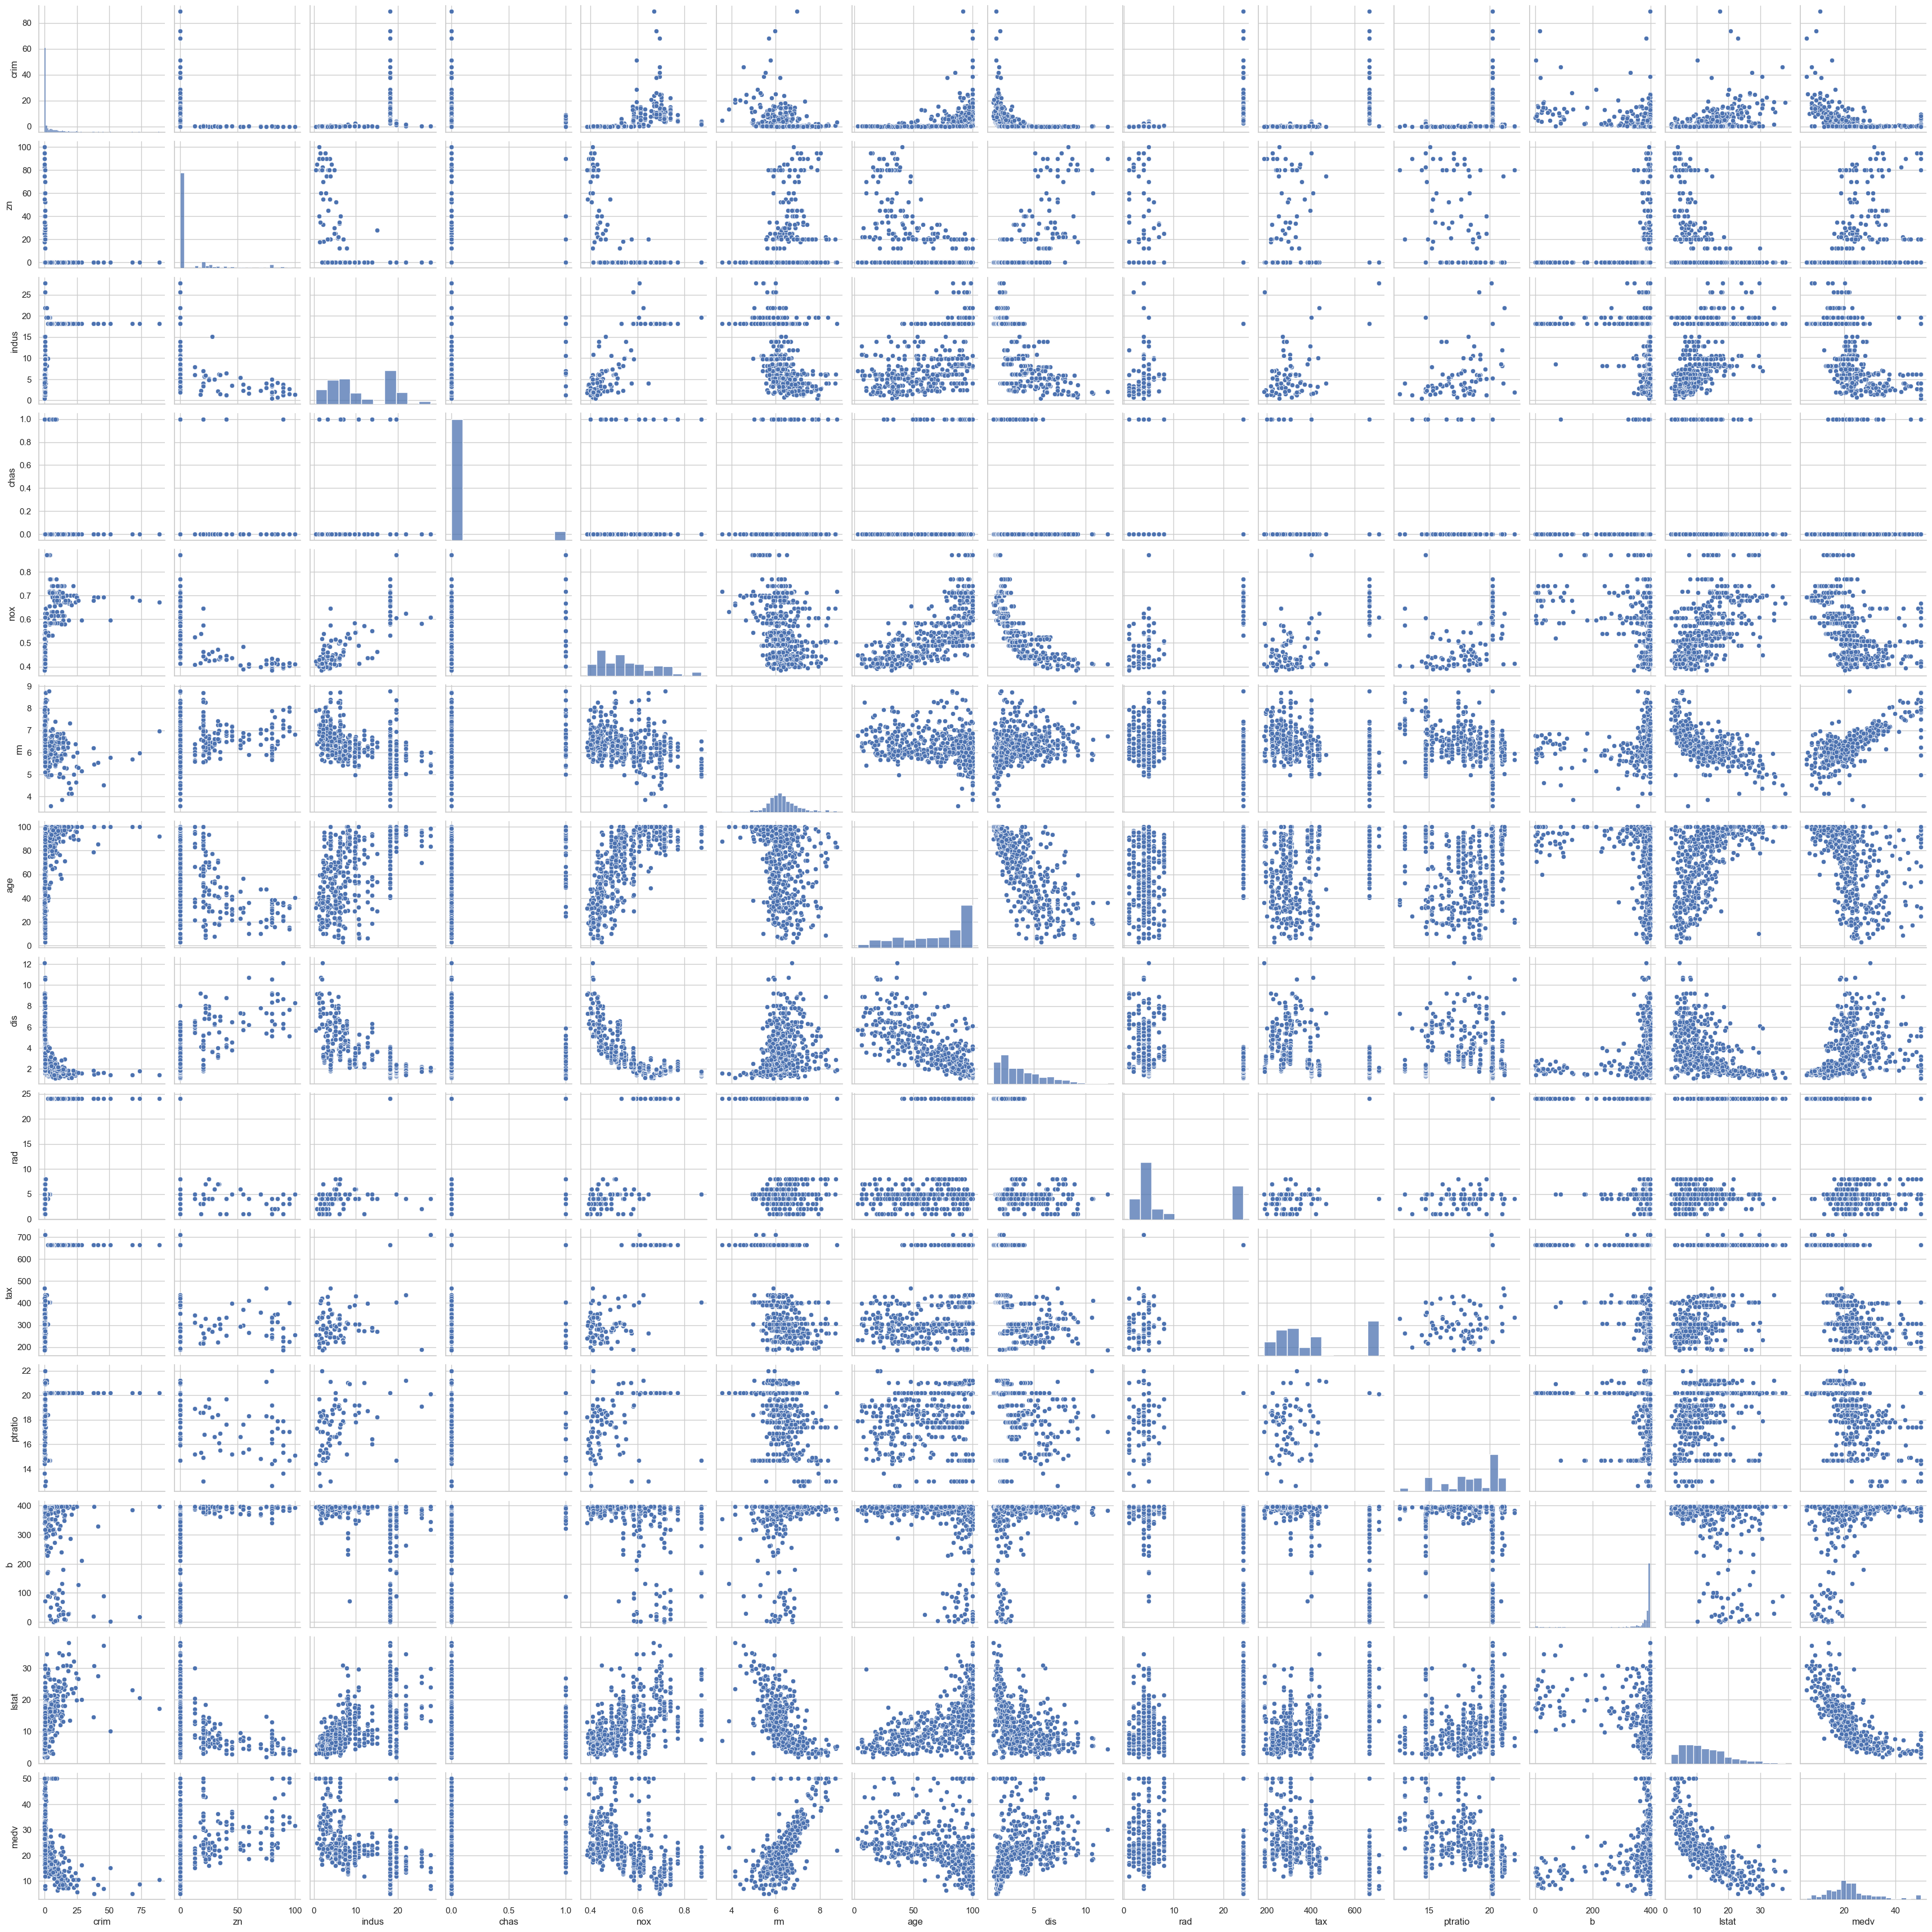

In [9]:
#EDA
sns.pairplot(dataset)

<Axes: >

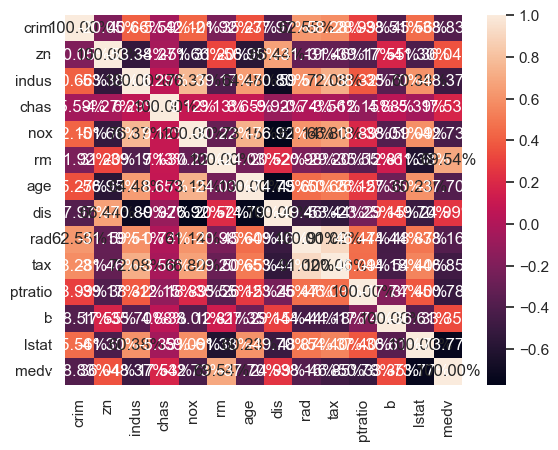

In [15]:
sb.heatmap(dataset.corr(),annot=True, fmt='.2%')

In [18]:
#Todo : Visualize coorelation of features
corr_medv = dataset.corrwith(dataset['medv'])
corr_medv

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
dtype: float64

In [20]:
#corr_medv[:,-1].abs().sort_values(ascending = False)

In [22]:
#Independent variable
X=dataset.iloc[:,:13].values


#Dependent variable
y=dataset.iloc[:,13].values

In [23]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [24]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
X_train

array([[-0.37257438, -0.49960763, -0.70492455, ..., -0.48463784,
         0.3716906 , -0.41100022],
       [-0.39709866, -0.49960763, -0.04487755, ...,  0.33649132,
         0.20501196, -0.38768057],
       [-0.402693  ,  0.77116771, -0.88675963, ..., -0.84958414,
         0.36660893, -0.18191902],
       ...,
       [-0.39805586, -0.49960763, -0.15941933, ..., -0.30216469,
         0.40342278, -0.33006734],
       [-0.38842357, -0.49960763, -0.60326872, ..., -0.25654641,
         0.38343489,  0.8359148 ],
       [-0.39951258, -0.49960763, -1.01275558, ..., -0.84958414,
         0.43041207,  0.27212814]])

In [28]:
X_test

array([[-0.43675261, -0.43988269, -1.26009787, ..., -0.74834628,
         0.26741336, -0.78804285],
       [ 0.46354201, -0.43988269,  1.09537107, ...,  0.86739045,
         0.17734381, -0.44982353],
       [-0.43213476, -0.43988269,  0.42804104, ..., -0.99315487,
         0.45162847, -0.30001862],
       ...,
       [-0.4286898 ,  0.69889992, -0.96051265, ...,  0.62258186,
         0.46524826,  0.10924221],
       [-0.42955423, -0.43988269, -0.09504426, ...,  0.08400295,
         0.37279275, -0.47298923],
       [-0.43078212, -0.43988269, -0.41682097, ...,  1.21012249,
         0.46654065, -0.02666327]])

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
lm_coeff = pd.Series(lm.coef_)
lm_coeff

0    -0.970820
1     1.057149
2     0.038311
3     0.594506
4    -1.855148
5     2.573219
6    -0.087615
7    -2.880943
8     2.112245
9    -1.875331
10   -2.292767
11    0.718179
12   -3.592455
dtype: float64

In [36]:
lm_coeff = pd.Series(lm.coef_, dataset.columns[:13])
lm_coeff

crim      -0.970820
zn         1.057149
indus      0.038311
chas       0.594506
nox       -1.855148
rm         2.573219
age       -0.087615
dis       -2.880943
rad        2.112245
tax       -1.875331
ptratio   -2.292767
b          0.718179
lstat     -3.592455
dtype: float64

<Axes: >

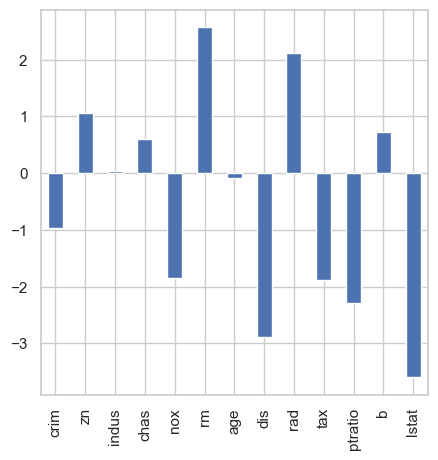

In [38]:
plt.figure(figsize=(5,5))
lm_coeff.plot(kind = 'bar')

<Axes: >

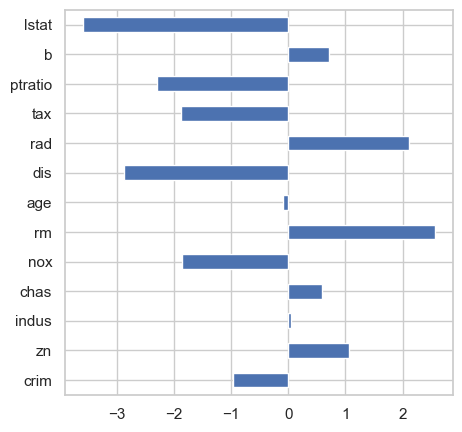

In [40]:
plt.figure(figsize=(5,5))
lm_coeff.plot(kind = 'barh')

# Ridge Regression

In [41]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,y_train)

Ridge()

In [43]:
rd_coeff = pd.Series(rid.coef_, dataset.columns[:13])
rd_coeff

crim      -0.962257
zn         1.040872
indus      0.011680
chas       0.598719
nox       -1.820134
rm         2.583786
age       -0.095188
dis       -2.848263
rad        2.036231
tax       -1.806092
ptratio   -2.283191
b          0.718310
lstat     -3.576073
dtype: float64

<Axes: >

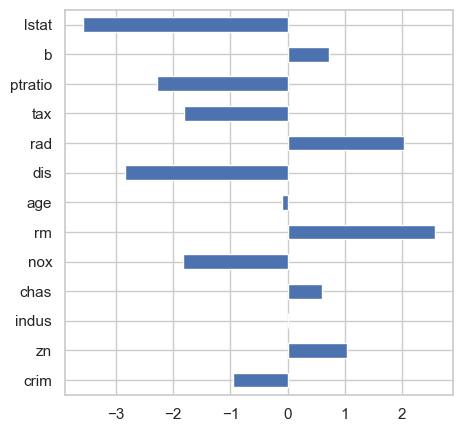

In [44]:
plt.figure(figsize=(5,5))
rd_coeff.plot(kind = 'barh')

# Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(X_train,y_train)

Lasso()

In [47]:
la_coeff = pd.Series(la.coef_, dataset.columns[:13])
la_coeff

crim      -0.000000
zn         0.000000
indus     -0.000000
chas       0.000000
nox       -0.000000
rm         2.540098
age       -0.000000
dis       -0.000000
rad       -0.000000
tax       -0.171527
ptratio   -1.784796
b          0.110959
lstat     -3.585324
dtype: float64

<Axes: >

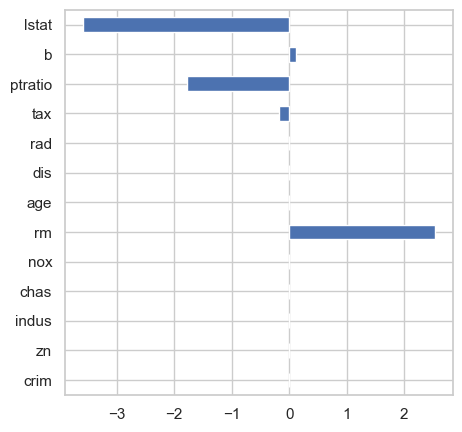

In [48]:
plt.figure(figsize=(5,5))
la_coeff.plot(kind = 'barh')

# ElasticNetRegression

In [50]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet()
elnet.fit(X_train,y_train)

ElasticNet()

In [51]:
elnet_coeff = pd.Series(elnet.coef_, dataset.columns[:13])
elnet_coeff

crim      -0.434070
zn         0.197817
indus     -0.346015
chas       0.351725
nox       -0.236910
rm         2.283687
age       -0.000000
dis       -0.000000
rad       -0.000000
tax       -0.460251
ptratio   -1.515535
b          0.451313
lstat     -2.263343
dtype: float64

<Axes: >

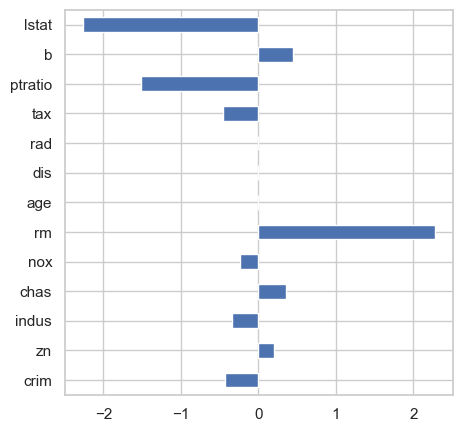

In [52]:
plt.figure(figsize=(5,5))
elnet_coeff.plot(kind = 'barh')

# Prediction

In [53]:
y_pred_lm = lm.predict(X_test)

In [54]:
y_pred_lm

array([25.87858248, 24.01180946, 30.22835216, 12.34741929, 21.99634736,
       20.07088862, 20.72545001, 22.20375949, 19.72636071, 20.57028457,
        6.73410705, 16.32222447, 16.92787983,  5.39156852, 41.1191538 ,
       34.15368419, 22.68369141, 38.6902057 , 31.93093555, 23.998803  ,
       25.62495493, 25.58050627, 20.7178016 , 31.46474264, 23.43086697,
       11.06711568, 18.05146901, 19.12240839, 36.31945761, 21.12936432,
       18.15273799, 17.85376713, 20.99040688, 25.06877849, 29.9221874 ,
       19.34749202, 10.82893847, 24.9863498 , 17.65248079, 14.94211016,
       27.35318353, 21.61187545, 23.28559795, 15.56506828, 24.06753435,
       26.11952311, 20.93697007, 23.66219925, 10.05672963, 24.63303274,
       21.97961263, 17.53385103, 25.27355142, 31.06893601, 13.56332149,
       22.59061065, 21.91170851, 16.38406947, 15.69163286, 22.54927731,
       19.26610599, 22.225494  , 34.18119455, 32.22256051, 17.95421529,
       34.12549335, 18.46277962, 20.34002451, 18.8839208 , 23.66

In [56]:
#Ridge Prediction
y_pred_rid = rid.predict(X_test)
#Lasso Prediction
y_pred_la = la.predict(X_test)
#Elasticnet Prediction
y_pred_elnet = elnet.predict(X_test)

# Model Accuracy

In [57]:
from sklearn import metrics


In [59]:
#Linear REgression
mae_lm = metrics.mean_squared_error(y_test,y_pred_lm)
mae_lm

35.11642077929317

In [60]:
# Model accuracy
metrics.r2_score(y_test,y_pred_lm)

0.5687450086990025

In [61]:
#Accuracy for test dataset:
lm.score(X_test,y_test)

0.5687450086990025

# Model Accuracy for Ridge model

In [63]:
mae_rid = metrics.mean_squared_error(y_test,y_pred_rid)
mae_rid

35.188945727501846

In [64]:
metrics.r2_score(y_test,y_pred_rid)

0.5678543499924842

In [65]:
rid.score(X_test,y_test)

0.5678543499924842

# Model Accuracy for Lasso model

In [66]:
mae_la = metrics.mean_squared_error(y_test,y_pred_la)
mae_la

40.620437100169255

In [67]:
metrics.r2_score(y_test,y_pred_la)

0.5011517159343934

In [68]:
la.score(X_test,y_test)

0.5011517159343934

# Model Accuracy for Elasticnet model

In [69]:
mae_elnet = metrics.mean_squared_error(y_test,y_pred_elnet)
mae_elnet

43.256122648084435

In [70]:
metrics.r2_score(y_test,y_pred_elnet)

0.46878359518592105

In [71]:
elnet.score(X_test,y_test)

0.46878359518592105

# Ridge Penalty value setting 'alpha'

In [72]:
from sklearn.model_selection import GridSearchCV
parameter= {'alpha':[1,5,10,20,25,30,35,40,45,50,60,70,80,100]}


In [80]:
ridge_regressor=GridSearchCV(rid,parameter,cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 5, 10, 20, 25, 30, 35, 40, 45, 50, 60, 70,
                                   80, 100]})

In [81]:
ridge_regressor.best_score_

0.7498253962279073

In [82]:
ridge_regressor.best_params_

{'alpha': 10}